## Explore the Input Variables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# read in relevant datasets

# input variables for clustering
cluster_1 = pd.read_csv("cluster_1_data.csv").drop(columns=["Unnamed: 0"])

# list of ascending LSOAs
ascending_LSOAs = pd.read_csv("ascending_LSOA_basic.csv").drop(columns=["Unnamed: 0"])

In [3]:
# extract only LSOA codes for ascending LSOAs

ascending_LSOAs = ascending_LSOAs.drop(ascending_LSOAs.columns[1:],axis=1)

In [4]:
cluster_1.head()

,LSOA11CD,conv_rates,newblt_rates,avg_churn_01_10,youngPop_chg,agePop_chg,hse_age_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01
0,E01000001,0.953289,0.000000,2.275180,-3.53,3.56,0.13,3.85,2.00,1.42,14.74
1,E01000002,1.055966,2.111932,2.284483,-5.57,5.60,1.29,7.84,3.61,0.06,13.13
2,E01000003,0.000000,0.000000,2.934233,1.21,-1.24,-3.20,2.60,-1.65,-0.79,20.11
3,E01000005,0.000000,8.695652,2.599725,-0.03,0.04,-3.28,-0.56,-4.30,1.75,12.86
4,E01000006,3.710575,1.855288,2.146893,2.23,-2.26,-2.07,-2.84,6.08,2.08,10.06


In [5]:
ascending_LSOAs.head()

,LSOA_Code
0,E01000006
1,E01000010
2,E01000029
3,E01000032
4,E01000043


In [6]:
# merge ascending LSOAs with their corresponding input variables

cluster_1 = ascending_LSOAs.merge(cluster_1, left_on = "LSOA_Code", right_on = "LSOA11CD", how = "left").set_index("LSOA_Code").drop(columns=["LSOA11CD"])

In [7]:
cluster_1.head()

,conv_rates,newblt_rates,avg_churn_01_10,youngPop_chg,agePop_chg,hse_age_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01
LSOA_Code,,,,,,,,,,
E01000006,3.710575,1.855288,2.146893,2.23,-2.26,-2.07,-2.84,6.08,2.08,10.06
E01000010,3.220612,11.272142,2.103787,6.41,-6.40,-7.41,9.40,3.47,-3.63,9.36
E01000029,0.000000,2.869440,2.064897,-0.87,0.88,0.00,-1.95,0.40,-2.46,26.90
E01000032,1.587302,7.936508,2.294618,3.30,-3.29,-4.77,-3.26,2.93,1.18,17.54
E01000043,0.000000,0.000000,2.359081,4.73,-4.73,-4.29,-8.27,12.89,-1.61,17.84


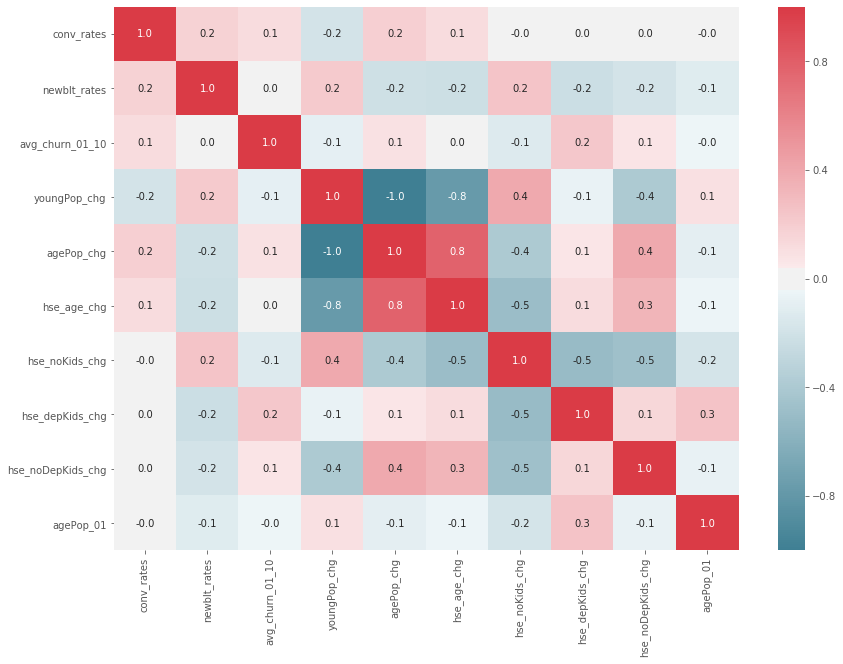

In [8]:
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

In [9]:
# removing 2 variables which have exhibited high multi-collinearity

cluster_1 = cluster_1.drop(columns=['youngPop_chg','hse_age_chg'])

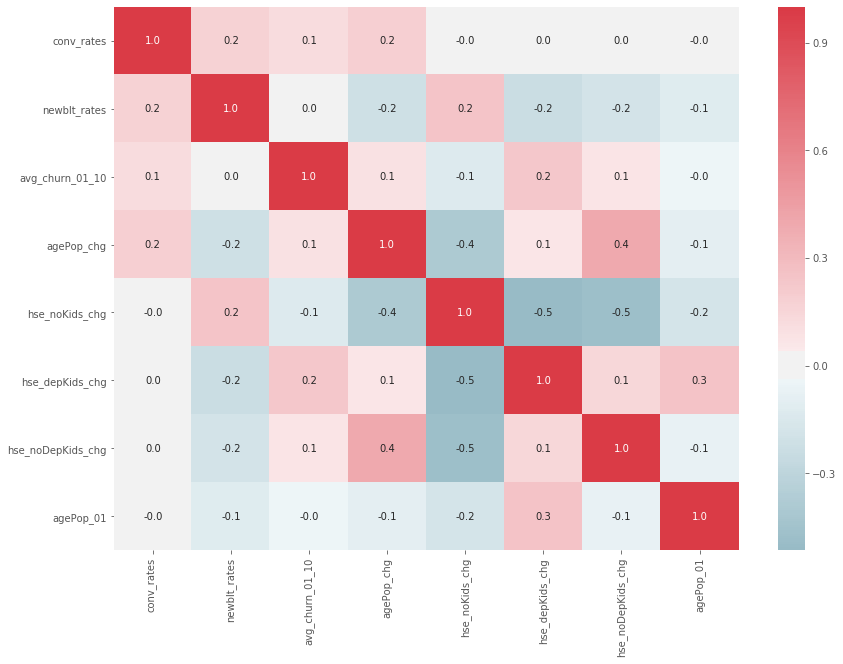

In [10]:
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

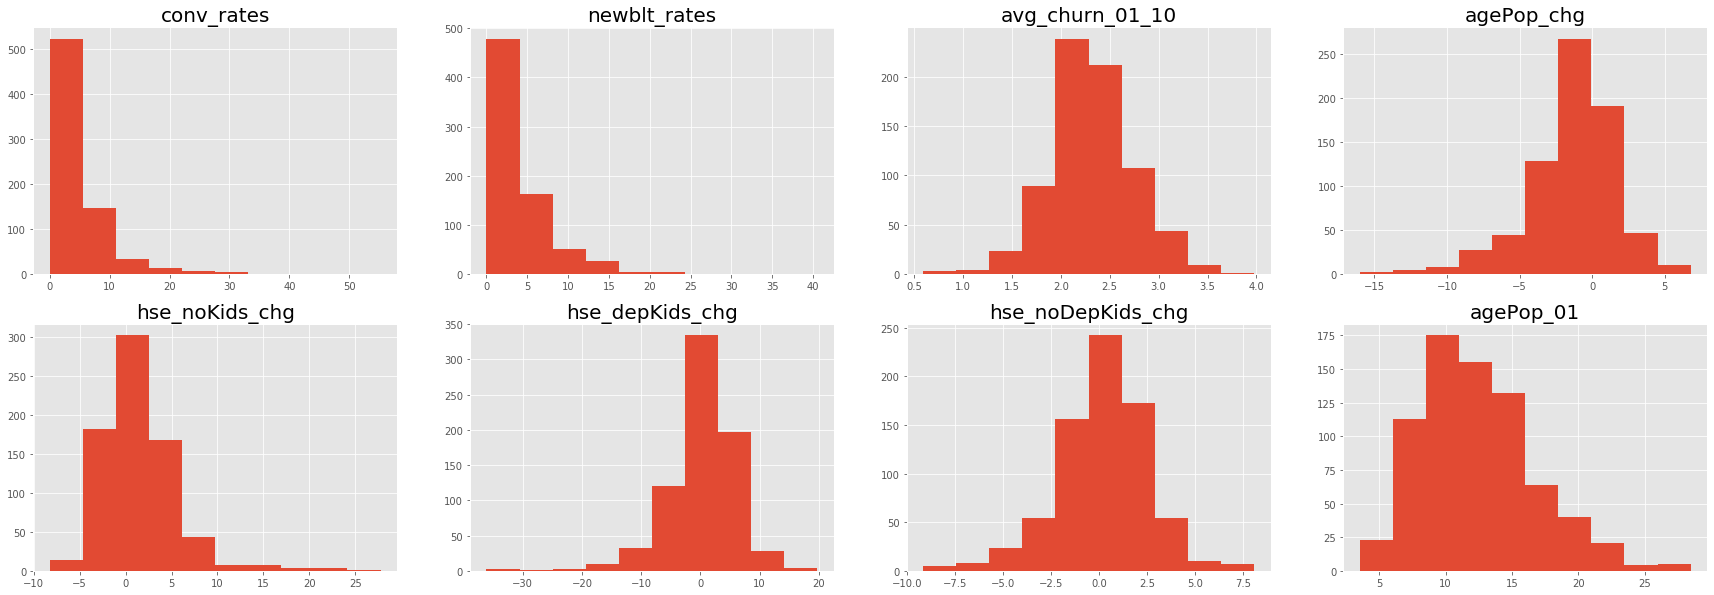

In [11]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1.columns):

            ax.hist(cluster_1[cluster_1.columns[counter]], label='{}'.format(cluster_1.columns[counter]))
            ax.set_title(cluster_1.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
        
plt.show()
        
# to output high-resolution image - uncomment the next line
# plt.savefig('Cluster_1_hist.png', dpi = 100)

## Transform the Input Variables

In [12]:
# without any transformation

cluster_1_noTrans = cluster_1[:]

In [13]:
# applying cube root transformation to data variables

cluster_1_cubeRoot = np.cbrt(cluster_1)

In [14]:
cluster_1_cubeRoot.head()

,conv_rates,newblt_rates,avg_churn_01_10,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01
LSOA_Code,,,,,,,,
E01000006,1.548153,1.228769,1.290041,-1.312309,-1.416140,1.825161,1.276501,2.158735
E01000010,1.476770,2.242171,1.281348,-1.856636,2.110454,1.513944,-1.536864,2.107456
E01000029,0.000000,1.421016,1.273404,0.958284,-1.249333,0.736806,-1.349931,2.996292
E01000032,1.166505,1.994695,1.318976,-1.487300,-1.482766,1.430944,1.056722,2.598224
E01000043,0.000000,0.000000,1.331213,-1.678625,-2.022252,2.344684,-1.172039,2.612953


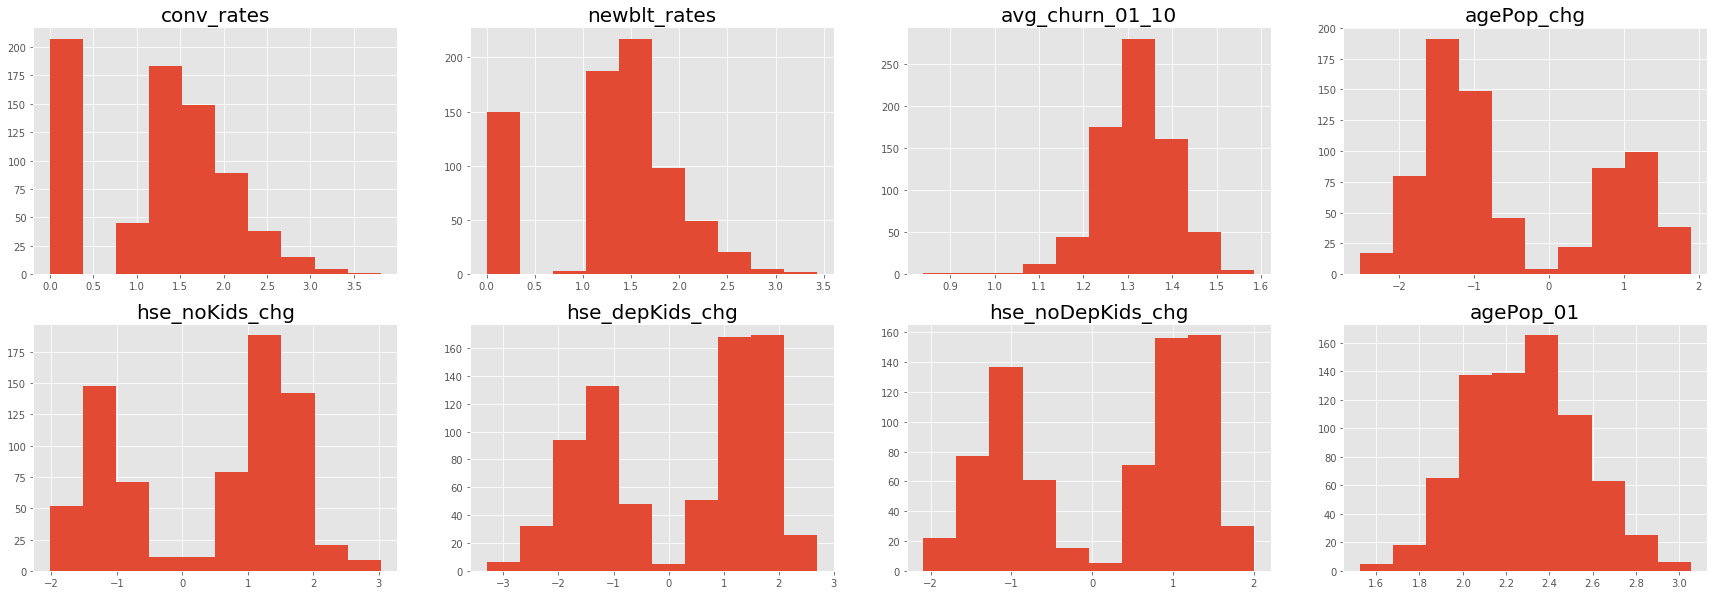

In [15]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_cubeRoot.columns):

            ax.hist(cluster_1_cubeRoot[cluster_1_cubeRoot.columns[counter]], label='{}'.format(cluster_1_cubeRoot.columns[counter]))
            ax.set_title(cluster_1_cubeRoot.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1


plt.show()

# to output high-resolution image - uncomment the next line
#plt.savefig('cluster_1_cubeRoot_hist.png', dpi = 100)

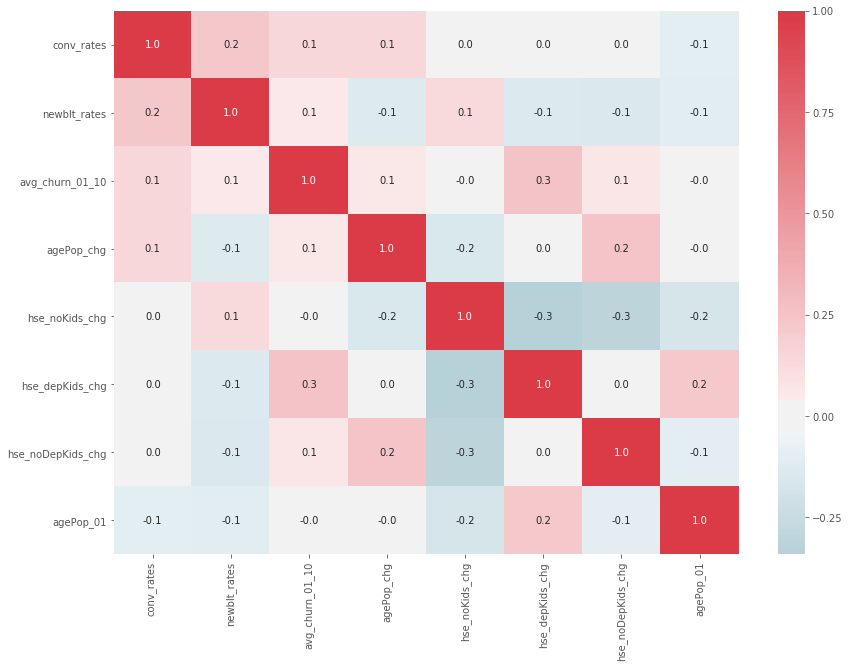

In [16]:
# check for multi-collinearity between variables

fig10, ax = plt.subplots()
fig10.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1_cubeRoot.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

In [17]:
# applying the Yeo-Johnson transformation to data variables

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(cluster_1)

cluster_1_yeoJohnson = pt.transform(cluster_1)

In [18]:
cluster_1_yeoJohnson = pd.DataFrame(cluster_1_yeoJohnson, index = cluster_1.index, columns = cluster_1.columns)

In [19]:
cluster_1_yeoJohnson.head()

,conv_rates,newblt_rates,avg_churn_01_10,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01
LSOA_Code,,,,,,,,
E01000006,0.363532,-0.275097,-0.396769,-0.384049,-1.251506,1.096375,0.770807,-0.474613
E01000010,0.249567,1.532317,-0.498009,-1.503238,1.722114,0.510593,-1.545108,-0.676221
E01000029,-1.326176,0.095280,-0.589375,0.694717,-0.886803,-0.115516,-1.113003,2.573138
E01000032,-0.268707,1.132544,-0.050051,-0.679778,-1.431531,0.394368,0.361696,1.180984
E01000043,-1.326176,-1.528506,0.101140,-1.071620,-3.865099,2.750559,-0.791036,1.234256


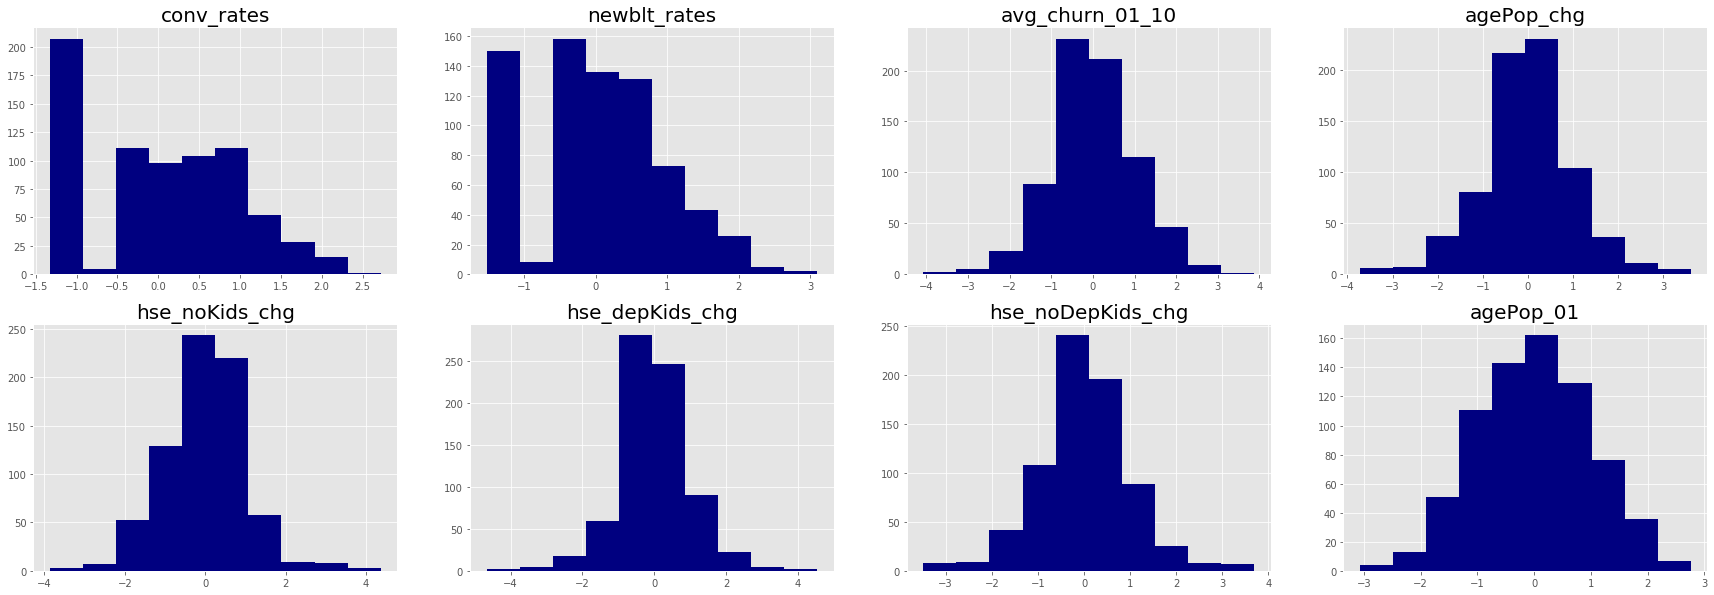

In [20]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_yeoJohnson.columns):

            ax.hist(cluster_1_yeoJohnson[cluster_1_yeoJohnson.columns[counter]], label='{}'.format(cluster_1_yeoJohnson.columns[counter]), color='navy')
            ax.set_title(cluster_1_yeoJohnson.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()
        
        counter += 1

plt.show()

# to output high-resolution image - uncomment the next line
#plt.savefig('cluster_1_yeoJohnson.png', dpi = 100)

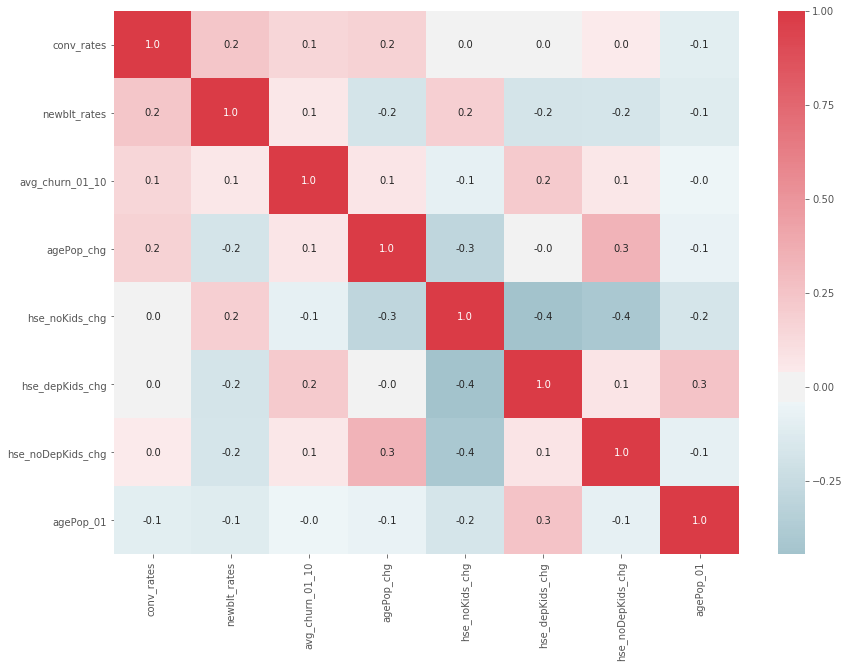

In [21]:
# check for multi-collinearity between variables

fig11, ax = plt.subplots()
fig11.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1_yeoJohnson.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

In [22]:
# applying the inverse hyperbolic sine transformation to data variables

cluster_1_invSine = np.arcsinh(cluster_1)

In [23]:
cluster_1_invSine.head()

,conv_rates,newblt_rates,avg_churn_01_10,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01
LSOA_Code,,,,,,,,
E01000006,2.022016,1.376980,1.507462,-1.554212,-1.766598,2.504847,1.478851,3.004176
E01000010,1.885994,3.117443,1.489110,-2.555494,2.936674,1.957446,-2.000834,2.932434
E01000029,0.000000,1.776331,1.472287,0.793927,-1.421049,0.390035,-1.632272,3.985619
E01000032,1.242234,2.768566,1.568130,-1.906370,-1.897609,1.796075,1.003106,3.558443
E01000043,0.000000,0.000000,1.593585,-2.258064,-2.809417,3.251100,-1.254271,3.575375


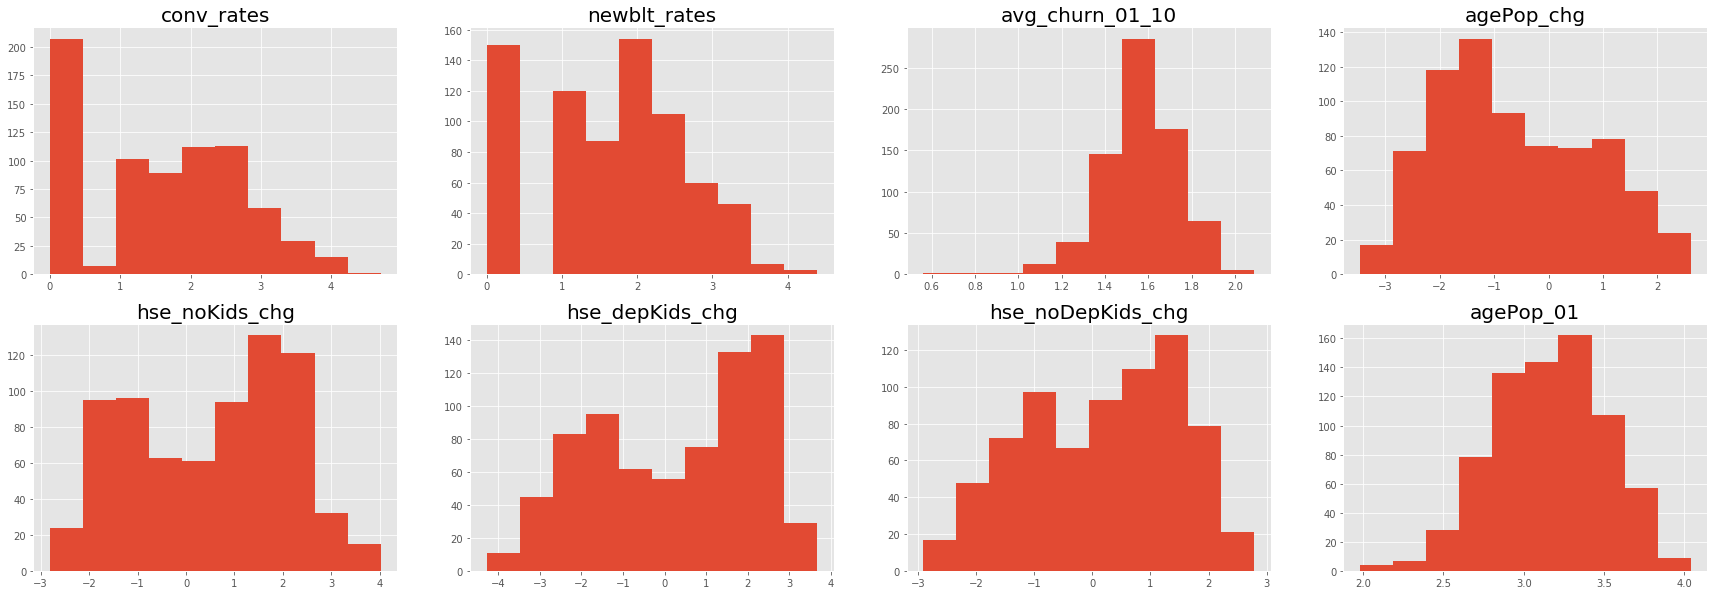

In [24]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_invSine.columns):

            ax.hist(cluster_1_invSine[cluster_1_invSine.columns[counter]], label='{}'.format(cluster_1_invSine.columns[counter]))
            ax.set_title(cluster_1_invSine.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

# to output high-resolution image - uncomment the next line
#plt.savefig('cluster_1_invSine.png', dpi = 100)

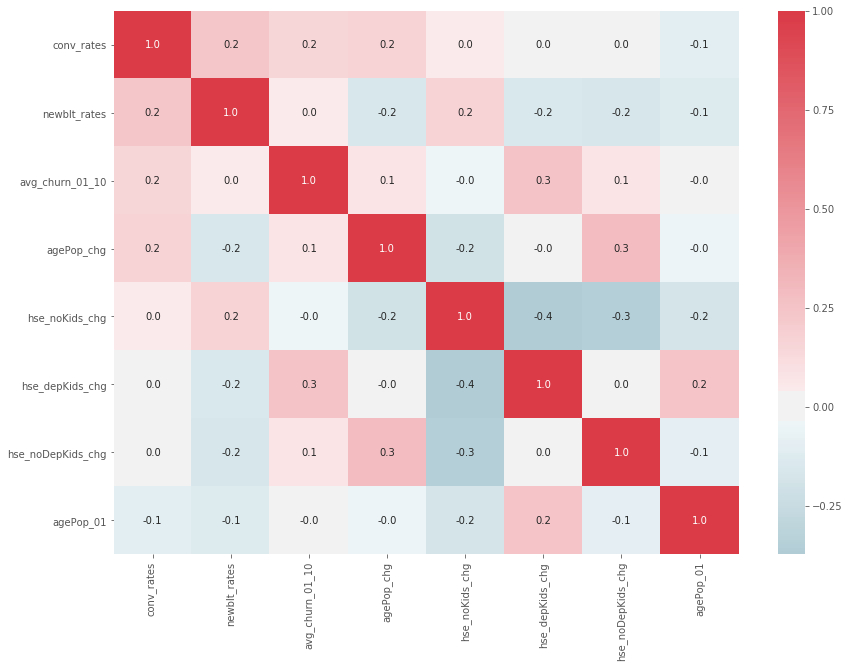

In [25]:
# check for multi-collinearity between variables

fig12, ax = plt.subplots()
fig12.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1_invSine.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

## Scaling the Input Variables 

In [26]:
# applying z-score standardisation on all 4 datasets

from scipy.stats import zscore

cluster_1_noTrans_zscore = cluster_1_noTrans.apply(zscore)
cluster_1_cubeRoot_zscore = cluster_1_cubeRoot.apply(zscore)
cluster_1_yeoJohnson_zscore = cluster_1_yeoJohnson.apply(zscore)
cluster_1_invSine_zscore = cluster_1_invSine.apply(zscore)

In [27]:
# applying RobustScaler (inter-quartile range standardisation) on all 4 datasets

from sklearn.preprocessing import RobustScaler

transformer1 = RobustScaler().fit(cluster_1_noTrans)
cluster_1_noTrans_robust = transformer1.transform(cluster_1_noTrans)
cluster_1_noTrans_robust = pd.DataFrame(cluster_1_noTrans_robust, index = cluster_1_noTrans.index, columns = cluster_1_noTrans.columns)


transformer2 = RobustScaler().fit(cluster_1_cubeRoot)
cluster_1_cubeRoot_robust = transformer2.transform(cluster_1_cubeRoot)
cluster_1_cubeRoot_robust = pd.DataFrame(cluster_1_cubeRoot_robust, index = cluster_1_cubeRoot.index, columns = cluster_1_cubeRoot.columns)


transformer3 = RobustScaler().fit(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_robust = transformer3.transform(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_robust = pd.DataFrame(cluster_1_yeoJohnson_robust, index = cluster_1_yeoJohnson.index, columns = cluster_1_yeoJohnson.columns)


transformer4 = RobustScaler().fit(cluster_1_invSine)
cluster_1_invSine_robust = transformer4.transform(cluster_1_invSine)
cluster_1_invSine_robust = pd.DataFrame(cluster_1_invSine_robust, index = cluster_1_invSine.index, columns = cluster_1_invSine.columns)

In [28]:
# applying RobustScaler (inter-decile range standardisation) on all 4 datasets

transformer5 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_noTrans)
cluster_1_noTrans_decile = transformer5.transform(cluster_1_noTrans)
cluster_1_noTrans_decile = pd.DataFrame(cluster_1_noTrans_decile, index = cluster_1_noTrans.index, columns = cluster_1_noTrans.columns)


transformer6 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_cubeRoot)
cluster_1_cubeRoot_decile = transformer6.transform(cluster_1_cubeRoot)
cluster_1_cubeRoot_decile = pd.DataFrame(cluster_1_cubeRoot_decile, index = cluster_1_cubeRoot.index, columns = cluster_1_cubeRoot.columns)


transformer7 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_decile = transformer7.transform(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_decile = pd.DataFrame(cluster_1_yeoJohnson_decile, index = cluster_1_yeoJohnson.index, columns = cluster_1_yeoJohnson.columns)


transformer8 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_invSine)
cluster_1_invSine_decile = transformer8.transform(cluster_1_invSine)
cluster_1_invSine_decile = pd.DataFrame(cluster_1_invSine_decile, index = cluster_1_invSine.index, columns = cluster_1_invSine.columns)

In [29]:
# check for heavily-skewed variables (i.e. skewness scores beyond +/- 1)

df_full = [cluster_1_noTrans_zscore, cluster_1_cubeRoot_zscore, cluster_1_yeoJohnson_zscore, cluster_1_invSine_zscore, cluster_1_noTrans_robust, cluster_1_cubeRoot_robust, cluster_1_yeoJohnson_robust, cluster_1_invSine_robust, cluster_1_noTrans_decile, cluster_1_cubeRoot_decile, cluster_1_yeoJohnson_decile, cluster_1_invSine_decile]
df_full_name = ["cluster_1_noTrans_zscore", "cluster_1_cubeRoot_zscore", "cluster_1_yeoJohnson_zscore", "cluster_1_invSine_zscore", "cluster_1_noTrans_robust", "cluster_1_cubeRoot_robust", "cluster_1_yeoJohnson_robust", "cluster_1_invSine_robust", "cluster_1_noTrans_decile", "cluster_1_cubeRoot_decile", "cluster_1_yeoJohnson_decile", "cluster_1_invSine_decile"]

for method in range(len(df_full)):
    counter = 0
    for col in range(0,8):
        if df_full[method][df_full[method].columns[col]].skew() > 1:
            counter += 1
        elif df_full[method][df_full[method].columns[col]].skew() <- 1:
            counter += 1
    print(str(df_full_name[method]) + " has " + str(counter) + " variables with skew >1 or <-1 \n")

cluster_1_noTrans_zscore has 4 variables with skew >1 or <-1 

cluster_1_cubeRoot_zscore has 0 variables with skew >1 or <-1 

cluster_1_yeoJohnson_zscore has 0 variables with skew >1 or <-1 

cluster_1_invSine_zscore has 0 variables with skew >1 or <-1 

cluster_1_noTrans_robust has 4 variables with skew >1 or <-1 

cluster_1_cubeRoot_robust has 0 variables with skew >1 or <-1 

cluster_1_yeoJohnson_robust has 0 variables with skew >1 or <-1 

cluster_1_invSine_robust has 0 variables with skew >1 or <-1 

cluster_1_noTrans_decile has 4 variables with skew >1 or <-1 

cluster_1_cubeRoot_decile has 0 variables with skew >1 or <-1 

cluster_1_yeoJohnson_decile has 0 variables with skew >1 or <-1 

cluster_1_invSine_decile has 0 variables with skew >1 or <-1 



## Clustering

For n_clusters = 2 The average silhouette_score is : 0.3095694223023172
For n_clusters = 3 The average silhouette_score is : 0.3227197467183262
For n_clusters = 4 The average silhouette_score is : 0.17312007873688237
For n_clusters = 5 The average silhouette_score is : 0.18406595089267214
For n_clusters = 6 The average silhouette_score is : 0.1682308639505986
For n_clusters = 7 The average silhouette_score is : 0.1707142136329351
For n_clusters = 8 The average silhouette_score is : 0.16202976157634283
For n_clusters = 9 The average silhouette_score is : 0.1525193539389089
For n_clusters = 10 The average silhouette_score is : 0.15271067214650208


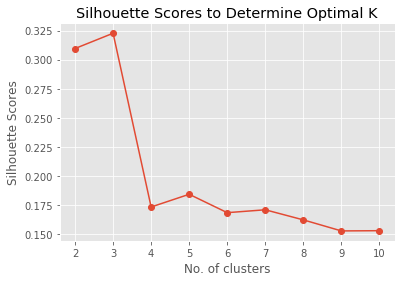

In [32]:
# check and plot silhouette scores to determine the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_1)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(cluster_1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores to Determine Optimal K')
plt.show()

In [33]:
# creating empty array to hold the performance measure for each cluster derived from individual dataset permutation

permutation = ["yeoJohnson-zscore", "yeoJohnson-robust(interquartile)","yeoJohnson-robust(interdecile)", "cubeRoot-zscore", "cubeRoot-robust(interquartile)","cubeRoot-robust(interdecile)","invSine-zscore", "invSine-robust(interquartile)", "invSine-robust(interdecile)"]
calinski_harabasz_scores = []

In [34]:
# k-means clustering for yeo-johnson dataset permutations

cluster_1_yeoJohnson_zscore_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_yeoJohnson_zscore)
cluster_1_yeoJohnson_robust_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_yeoJohnson_robust)
cluster_1_yeoJohnson_decile_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_yeoJohnson_decile)

cluster_1_yeoJohnson_zscore_labels = cluster_1_yeoJohnson_zscore_kmeans.labels_
cluster_1_yeoJohnson_robust_labels = cluster_1_yeoJohnson_robust_kmeans.labels_
cluster_1_yeoJohnson_decile_labels = cluster_1_yeoJohnson_decile_kmeans.labels_

In [35]:
cluster_1_yJ_zscore_original = cluster_1[:]
cluster_1_yJ_zscore_original["cluster_1_yeoJohnson_zscore_labels"]=cluster_1_yeoJohnson_zscore_labels

C:\Users\jytg1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
cluster_1_yJ_robust_original = cluster_1[:]
cluster_1_yJ_robust_original["cluster_1_yeoJohnson_robust_labels"]=cluster_1_yeoJohnson_robust_labels

C:\Users\jytg1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
cluster_1_yJ_decile_original = cluster_1[:]
cluster_1_yJ_decile_original["cluster_1_yeoJohnson_decile_labels"]=cluster_1_yeoJohnson_decile_labels

C:\Users\jytg1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
# measuring the performance for yeo-johnson dataset permutations

from sklearn import metrics
from sklearn.metrics import pairwise_distances

print(metrics.calinski_harabasz_score(cluster_1_yJ_zscore_original, cluster_1_yeoJohnson_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_yJ_zscore_original, cluster_1_yeoJohnson_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_1_yJ_robust_original, cluster_1_yeoJohnson_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_yJ_robust_original, cluster_1_yeoJohnson_robust_labels))

print(metrics.calinski_harabasz_score(cluster_1_yJ_decile_original, cluster_1_yeoJohnson_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_yJ_decile_original, cluster_1_yeoJohnson_decile_labels))

128.82396749548252
101.66638596352529
130.62741060909687


In [39]:
# k-means clustering for cube-root dataset permutations

cluster_1_cubeRoot_zscore_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_cubeRoot_zscore)
cluster_1_cubeRoot_robust_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_cubeRoot_robust)
cluster_1_cubeRoot_decile_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_cubeRoot_decile)

cluster_1_cubeRoot_zscore_labels = cluster_1_cubeRoot_zscore_kmeans.labels_
cluster_1_cubeRoot_robust_labels = cluster_1_cubeRoot_robust_kmeans.labels_
cluster_1_cubeRoot_decile_labels = cluster_1_cubeRoot_decile_kmeans.labels_

In [40]:
cluster_1_cB_zscore_original = cluster_1[:]
cluster_1_cB_zscore_original["cluster_1_cubeRoot_zscore_labels"]=cluster_1_cubeRoot_zscore_labels

C:\Users\jytg1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
cluster_1_cB_robust_original = cluster_1[:]
cluster_1_cB_robust_original["cluster_1_cubeRoot_robust_labels"]=cluster_1_cubeRoot_robust_labels

C:\Users\jytg1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
cluster_1_cB_decile_original = cluster_1[:]
cluster_1_cB_decile_original["cluster_1_cubeRoot_decile_labels"]=cluster_1_cubeRoot_decile_labels

C:\Users\jytg1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
# measuring the performance for cube-root dataset permutations

print(metrics.calinski_harabasz_score(cluster_1_cB_zscore_original, cluster_1_cubeRoot_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_cB_zscore_original, cluster_1_cubeRoot_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_1_cB_robust_original, cluster_1_cubeRoot_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_cB_robust_original, cluster_1_cubeRoot_robust_labels))

print(metrics.calinski_harabasz_score(cluster_1_cB_decile_original, cluster_1_cubeRoot_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_cB_decile_original, cluster_1_cubeRoot_decile_labels))

110.99060387558389
71.64491887187938
108.06060770663801


In [44]:
# k-means clustering for inverse sine dataset permutations

cluster_1_invSine_zscore_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_invSine_zscore)
cluster_1_invSine_robust_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_invSine_robust)
cluster_1_invSine_decile_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_invSine_decile)

cluster_1_invSine_zscore_labels = cluster_1_invSine_zscore_kmeans.labels_
cluster_1_invSine_robust_labels = cluster_1_invSine_robust_kmeans.labels_
cluster_1_invSine_decile_labels = cluster_1_invSine_decile_kmeans.labels_

In [45]:
cluster_1_iS_zscore_original = cluster_1[:]
cluster_1_iS_zscore_original["cluster_1_invSine_zscore_labels"]=cluster_1_invSine_zscore_labels

C:\Users\jytg1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
cluster_1_iS_robust_original = cluster_1[:]
cluster_1_iS_robust_original["cluster_1_invSine_robust_labels"]=cluster_1_invSine_robust_labels

C:\Users\jytg1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
cluster_1_iS_decile_original = cluster_1[:]
cluster_1_iS_decile_original["cluster_1_invSine_decile_labels"]=cluster_1_invSine_decile_labels

C:\Users\jytg1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
# measuring the performance for inverse sine dataset permutations

print(metrics.calinski_harabasz_score(cluster_1_iS_zscore_original, cluster_1_invSine_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_iS_zscore_original, cluster_1_invSine_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_1_iS_robust_original, cluster_1_invSine_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_iS_robust_original, cluster_1_invSine_robust_labels))

print(metrics.calinski_harabasz_score(cluster_1_iS_decile_original, cluster_1_invSine_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_iS_decile_original, cluster_1_invSine_decile_labels))

121.0892776985362
78.10071715585241
118.24944545968556


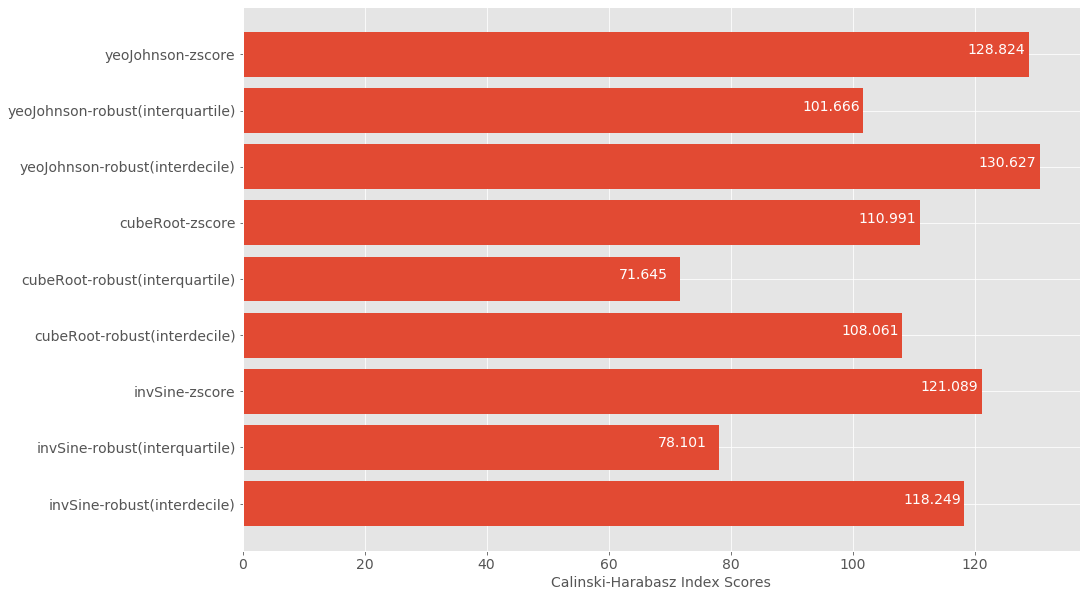

In [49]:
# visualise all performance scores using a barplot

fig, ax = plt.subplots(figsize=(15, 10))

ax.barh(permutation, calinski_harabasz_scores)
#ax.set_yticks(y_pos)
ax.set_yticklabels(permutation, fontsize=14)
ax.set_xticklabels(range(0,140,20), fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Calinski-Harabasz Index Scores',fontsize=14)
#ax.set_title('Quality of Clusters from Different Dataset Permutations')

for i in range(len(permutation)):
    plt.text(x = calinski_harabasz_scores[i]-10, y = i, s = calinski_harabasz_scores[i].round(3), size = 14, color="white")

plt.show()

In [50]:
# extracting cluster details of the best-performing dataset

cluster_1_yJ_decile_original.groupby("cluster_1_yeoJohnson_decile_labels").size()

cluster_1_yeoJohnson_decile_labels
0    108
1    334
2    290
dtype: int64

In [51]:
# appending cluster labels to main dataset

cluster_1_yeoJohnson_decile["cluster_1_yeoJohnson_decile_labels"]=cluster_1_yeoJohnson_decile_labels

In [52]:
# creating a new dataset for plotting purposes

radar_1 = cluster_1_yeoJohnson_decile.groupby("cluster_1_yeoJohnson_decile_labels").mean().reset_index()

In [53]:
radar_1.head()

,cluster_1_yeoJohnson_decile_labels,conv_rates,newblt_rates,avg_churn_01_10,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01
0,0,-0.163634,0.246344,-0.246190,-0.489102,0.498388,-0.448501,-0.493741,-0.134415
1,1,0.210244,0.018995,0.168481,0.174869,0.001861,0.010391,0.072974,-0.156688
2,2,-0.324380,-0.214218,-0.072130,-0.023553,-0.263120,0.219712,0.097794,0.195483


In [54]:
# check the means of the entire dataset

cluster_1_yeoJohnson_decile.mean()

conv_rates                           -0.056723
newblt_rates                         -0.039855
avg_churn_01_10                       0.011976
agePop_chg                           -0.001704
hse_noKids_chg                       -0.029860
hse_depKids_chg                       0.025613
hse_noDepKids_chg                    -0.000807
agePop_01                            -0.013881
cluster_1_yeoJohnson_decile_labels    1.248634
dtype: float64

In [55]:
# appending dataset average values to main dataset

radar_avg = cluster_1_yeoJohnson_decile.drop(columns = ["cluster_1_yeoJohnson_decile_labels"]).mean().reset_index()

In [56]:
# rename columns for legibility

radar_avg = radar_avg.rename(columns={"index":"var", 0: "value"})

In [57]:
radar_avg.head()

,var,value
0,conv_rates,-0.056723
1,newblt_rates,-0.039855
2,avg_churn_01_10,0.011976
3,agePop_chg,-0.001704
4,hse_noKids_chg,-0.029860


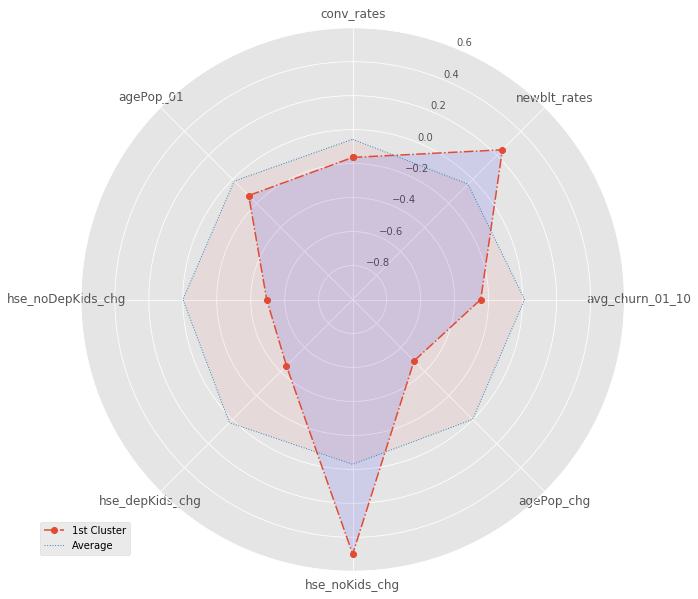

In [58]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variables
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
plt.ylim(-1,0.6)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="1st Cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Average")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

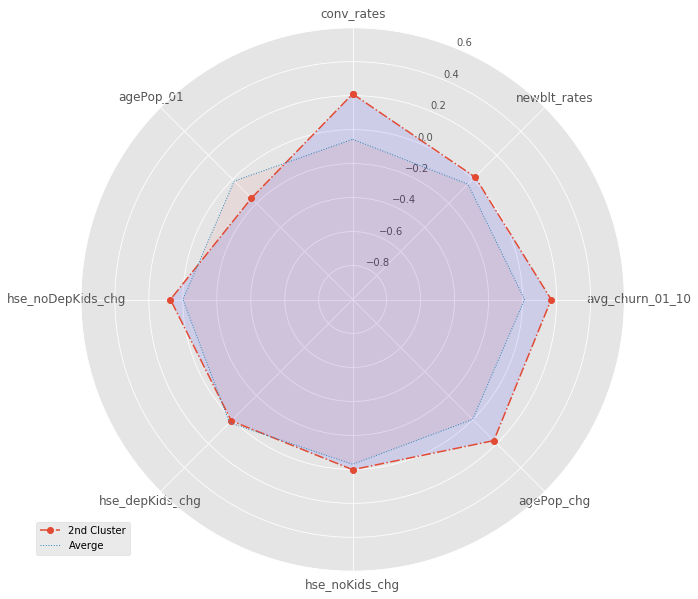

In [59]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 2nd cluster

fig2, ax = plt.subplots()
fig2.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
plt.ylim(-1,0.6)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[1,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="2nd Cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Averge")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

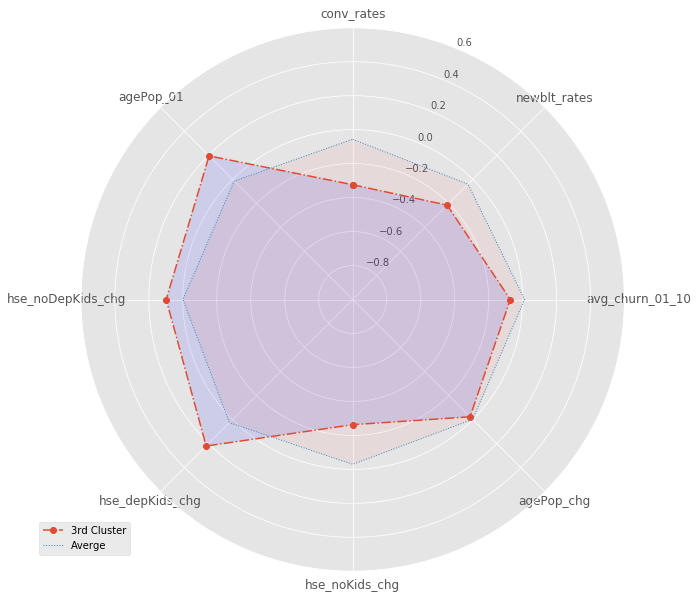

In [68]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 3rd cluster

fig3, ax = plt.subplots()
fig3.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
plt.ylim(-1,0.6)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[2,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="3rd Cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Averge")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [61]:
# create new feature column in main dataset to host label categories

cluster_1_yJ_decile_cat = cluster_1_yJ_decile_original[:].reset_index()
cluster_1_yJ_decile_cat["cluster_1_yJ_decile_cat"] = ""

In [62]:
cluster_1_yJ_decile_cat.head()

,LSOA_Code,conv_rates,newblt_rates,avg_churn_01_10,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01,cluster_1_yeoJohnson_decile_labels,cluster_1_yJ_decile_cat
0,E01000006,3.710575,1.855288,2.146893,-2.26,-2.84,6.08,2.08,10.06,2,
1,E01000010,3.220612,11.272142,2.103787,-6.40,9.40,3.47,-3.63,9.36,0,
2,E01000029,0.000000,2.869440,2.064897,0.88,-1.95,0.40,-2.46,26.90,2,
3,E01000032,1.587302,7.936508,2.294618,-3.29,-3.26,2.93,1.18,17.54,2,
4,E01000043,0.000000,0.000000,2.359081,-4.73,-8.27,12.89,-1.61,17.84,2,


In [63]:
# parse cluster labels to derive their categories 

for i in range(len(cluster_1_yJ_decile_cat)):
    if cluster_1_yJ_decile_cat.loc[i, "cluster_1_yeoJohnson_decile_labels"]==0:
        cluster_1_yJ_decile_cat.loc[i, "cluster_1_yJ_decile_cat"]="NRW"
    elif cluster_1_yJ_decile_cat.loc[i, "cluster_1_yeoJohnson_decile_labels"]==1:
        cluster_1_yJ_decile_cat.loc[i, "cluster_1_yJ_decile_cat"]="GEN"
    elif cluster_1_yJ_decile_cat.loc[i, "cluster_1_yeoJohnson_decile_labels"]==2:
        cluster_1_yJ_decile_cat.loc[i, "cluster_1_yJ_decile_cat"]="IUP"

In [64]:
# checkpoint - output file
# cluster_1_yJ_decile_cat.to_csv("cluster_1_cat.csv")

In [65]:
# extract only gentrifying LSOAs

cluster_1_yJ_decile_gen = cluster_1_yJ_decile_cat.loc[cluster_1_yJ_decile_cat["cluster_1_yJ_decile_cat"]=="GEN"]

In [66]:
cluster_1_yJ_decile_gen.head()

,LSOA_Code,conv_rates,newblt_rates,avg_churn_01_10,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01,cluster_1_yeoJohnson_decile_labels,cluster_1_yJ_decile_cat
9,E01000136,17.211704,5.163511,2.235650,1.39,-0.42,1.56,-0.81,19.56,1,GEN
13,E01000146,31.914894,13.677812,2.652839,-1.88,1.42,-1.08,1.30,13.24,1,GEN
16,E01000169,5.899705,2.949853,2.404371,1.31,-0.97,4.06,1.00,11.51,1,GEN
18,E01000181,6.088280,7.610350,2.410383,2.23,-2.12,2.78,1.28,8.82,1,GEN
21,E01000201,13.257576,1.893939,2.153846,1.89,0.54,-3.92,5.25,16.14,1,GEN


In [67]:
# checkpoint - output file
# cluster_1_yJ_decile_gen.to_csv("cluster_1_gen.csv")